# THIS NOTEBOOK GENERATES ALL FIGURES OF THE PROYECT

In [2]:
from functions import *

In [2]:
import os
os.mkdir('figures')
os.mkdir('figures/1.Statistics_description')
os.mkdir('figures/2.Resistance_description')
os.mkdir('figures/3.Resistance_tendency')
os.mkdir('figures/4.Resistance_tendency_by_country')

# BASIC STATISTICS OF CARBAPENEMS DATA

Database description

<ipython-input-5-c8ac576e245d>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


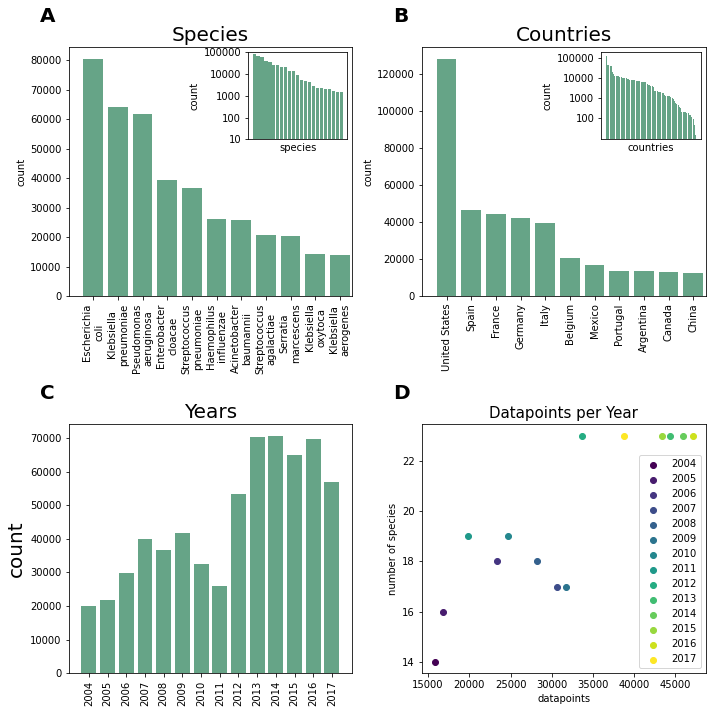

In [5]:
#%%DATASET DESCRIPTION
import string
spC=pd.read_csv('data/key_Species.txt', '\t', header=None)
cC=pd.read_csv('data/key_Country.txt', '\t', header=None)
yC=pd.read_csv('data/key_Year.txt', '\t', header=None)
spC=spC.sort_values([1],ascending=False)
cC=cC.sort_values([1],ascending=False)
yC=yC.sort_values([1],ascending=False)
Lab=[z.replace(' ','\n') for z in spC[0]]

fig=plt.figure(figsize=(10,10))
color1='#006837'

#FIG S1A
ax=fig.add_subplot(2,2,1)
ax.bar(spC[0],spC[1], facecolor=color1, alpha=0.6)
ax.set_xticklabels(Lab, rotation=90)
ax.set_xlim([-1,10.5])
ax.set_ylabel('count')
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

#INSET
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
a=inset_axes(ax,width="35%",height="35%",loc='upper right')
a.bar(spC[0],spC[1], facecolor=color1, alpha=0.6)
a.set_yscale('log')
a.set_ylabel('count')
a.set_yticks([10, 100, 1000, 10000, 100000])
a.set_yticklabels(ax.get_yticks(), size=10)
a.set_xticks([])
a.set_xlabel('species', fontsize=10)
a.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Species', fontsize=20)

ax.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax.transAxes, size=20, weight='bold')

#FIG S1B
ax=fig.add_subplot(2,2,2)
ax.bar(cC[0],cC[1], facecolor=color1, alpha=0.6)
ax.set_xticklabels(cC[0], rotation=90)
ax.set_xlim([-1,10.5])
ax.set_ylabel('count')
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
a=inset_axes(ax,width="35%",height="35%",loc='upper right')
a.bar(cC[0],cC[1], facecolor=color1, alpha=0.6)
a.set_yscale('log')
a.set_ylabel('count', fontsize=10)
a.set_yticks([100, 1000, 10000, 100000])
a.set_yticklabels(ax.get_yticks())
a.set_xticks([])
a.set_xlabel('countries', fontsize=10)
a.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Countries', fontsize=20)

ax.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax.transAxes, size=20, weight='bold')

#FIG S1C
ax=fig.add_subplot(2,2,3)
ax.bar(yC[0],yC[1], facecolor=color1, alpha=0.6)
ax.set_xticks(sorted(yC[0]))
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel('count', fontsize=20)
ax.set_yticklabels(ax.get_yticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Years', fontsize=20)

ax.text(-0.1, 1.1, string.ascii_uppercase[2], transform=ax.transAxes, size=20, weight='bold')

#FIG S1D
ax=fig.add_subplot(2,2,4)
DF=pd.read_csv('data/datapoints_per_year.csv')
yL=DF['Year'].tolist()
spL=DF['Species'].tolist()
dataL=DF['Datapoints'].tolist()
vals = np.linspace(0,1,len(spL))
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
labels=[str(z) for z in yL]
colors=[cmap(z) for z in vals]
for y1,y in enumerate(yL):
    ax.scatter(dataL[y1],spL[y1],c=[colors[y1]],label=labels[y1])
ax.legend(loc='best', ncol=1)
ax.set_xticklabels(ax.get_xticks())
ax.set_xlabel('datapoints')
ax.set_yticklabels(ax.get_yticks())
ax.set_ylabel('number of species')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Datapoints per Year', fontsize=15)

ax.text(-0.1, 1.1, string.ascii_uppercase[3], transform=ax.transAxes, size=20, weight='bold')

fig.tight_layout()
fig.savefig('figures/1.Statistics_description/description.pdf', format='pdf', dpi=1000)


# DESCRIPTION OF THE GLOBAL STATE OF CARBAPENEMS RESISTANCE

(VER IMAGENES EN LA CARPETA figures/2.Resistance_description)

In [6]:
DF, pL, bP, drugs=read_dataset('data/')             

In [7]:
DFt=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
matplotlib.rc('figure', max_open_warning = 0)
for sp in pL:
    for dr in drugs:
        if dr not in bP[sp]: continue
        pY,pM,sM=mic_dist(sp,dr,DF,bP[sp][dr][0])
        if not pY: continue
        print(sp,dr)
        fig=plt.figure(figsize=(10,10))
        color1='blue'#blue-ish
        color2='red'#reddish
        title=sp+'\n'+dr
        Z, pY=read_micdist(sp,dr)
        ax=plt.gca()
        H=plot_micdist(Z,pY,fig,ax,title)
        
        #PLOT TRENDS OVER HEATMAP
        DFc=DFt[(DFt.Species==sp) & (DFt.Antibiotic==dr)]
        xp=np.linspace(2003,2020,100)
        #global trend
        Gi=DFc.Intercept.mean()
        Gs=DFc.Trend.mean()
        yp=[Gi+z*Gs for z in xp]
        
        #R cluster trend
        Ri=DFc.RIntercept.mean()
        Rs=DFc.Rtrend.mean()
        yp=[Ri+z*Rs for z in xp]
        ax.plot(xp,yp,'--', color=color2,lw=2)
        
        #S cluster trend
        Si=DFc.SIntercept.mean()
        Ss=DFc.Strend.mean()
        yp=[Si+z*Ss for z in xp]
        ax.plot(xp,yp,'--', color=color1,lw=2)        
        ax.set_xlim([min(pY), max(pY)+1])
        fig.tight_layout()
        filename = '{}_{}.eps'.format(sp,dr)
        fig.savefig('figures/2.Resistance_description/'+filename)
        fig.clf()

Escherichia coli Doripenem
Escherichia coli Imipenem
Escherichia coli Meropenem
Klebsiella pneumoniae Doripenem
Klebsiella pneumoniae Imipenem
Klebsiella pneumoniae Meropenem
Pseudomonas aeruginosa Doripenem
Pseudomonas aeruginosa Imipenem
Pseudomonas aeruginosa Meropenem
Enterobacter cloacae Doripenem
Enterobacter cloacae Imipenem
Enterobacter cloacae Meropenem
Streptococcus pneumoniae Doripenem
Streptococcus pneumoniae Imipenem
Streptococcus pneumoniae Meropenem
Haemophilus influenzae Doripenem
Haemophilus influenzae Imipenem
Haemophilus influenzae Meropenem
Acinetobacter baumannii Doripenem
Acinetobacter baumannii Imipenem
Acinetobacter baumannii Meropenem
Streptococcus agalactiae Doripenem
Streptococcus agalactiae Meropenem
Serratia marcescens Doripenem
Serratia marcescens Imipenem
Serratia marcescens Meropenem
Klebsiella oxytoca Doripenem
Klebsiella oxytoca Imipenem
Klebsiella oxytoca Meropenem
Klebsiella aerogenes Doripenem
Klebsiella aerogenes Imipenem
Klebsiella aerogenes Merop

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

# DESCRIPTION OF THE GLOBAL TENDENCY OF CARBAPENEMS RESISTANCE

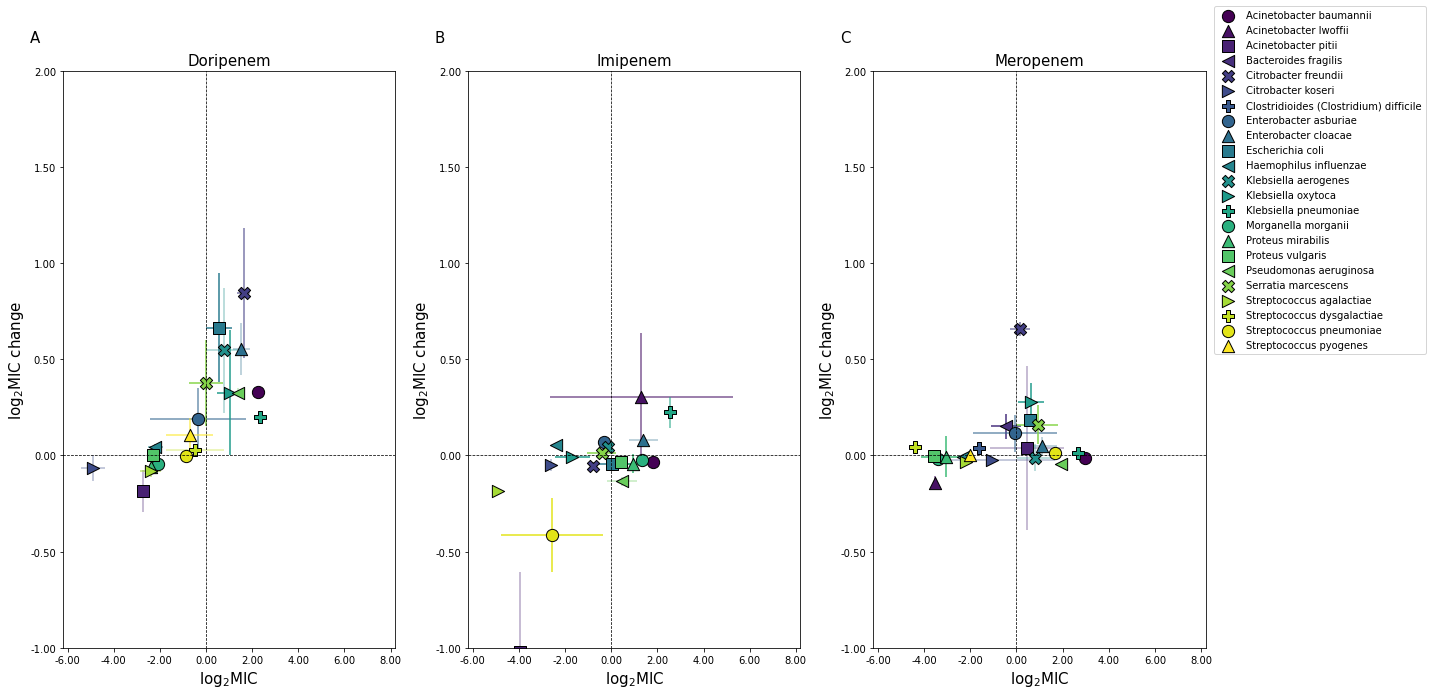

In [9]:
DFM=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
pL=get_key(DFM, 'Species')
drugs=get_key(DFM, 'Antibiotic')

#COLORS
vals=np.linspace(0,1,len(pL))#each specie will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))

LS=['o', '^', 's', '<', 'X', '>', 'P']
TL=['A', 'B', 'C']
TA=[1.0, 0.7, 0.4]
LM={}
LC={}
LA={}
for count, p in enumerate(pL):
    LM[p]=LS[count%len(LS)]
    LC[p]=cmap(count)
    LA[p]=TA[count%len(TA)]

#COLORS WITH TRANSPARENCY
LC2={}
for key,value in LC.items():
    mV=max(value[0:3])
    LC2[key]=tuple([z for z in value[0:3]]+[LA[key]])

#PLOT
fig=plt.figure(figsize=(20,10))


handles=[]
labels=[]
for i,dr in enumerate(drugs):
    DFdr=DFM[DFM.Antibiotic==dr]
    ax=fig.add_subplot(1,3,i+1)
    minx=1e6
    maxx=-1e6
    miny=1e6
    maxy=-1e6
    for p in pL:
        DF=DFdr[DFdr.Species==p]
        if DF.empty: continue                
        #PHASE PLANE FOR R
        x=DF['R2017'].mean()
        xerr=DF['R2017error'].mean()
        y=DF['Rtrend'].mean()
        yerr=DF['Rtrenderror'].mean() 
        minx=min(minx,x)
        miny=min(miny,y)
        maxx=max(maxx,x)
        maxy=max(maxy,y)
        ax.scatter(x,y,edgecolors='black',color=LC[p] ,marker=LM[p], s=150, zorder=2, label=p)
        ax.errorbar(x,y,fmt='o',color=LC2[p],markersize=0, xerr=xerr,yerr=yerr, zorder=1, alpha=LA[p])
    #LABELS
    ax.set_xlabel('log$_2$MIC', fontsize=15)
    ax.set_ylabel('log$_2$MIC change', fontsize=15)
    ax.set_yticklabels(ax.get_yticks(), size=10)
    ax.set_xticklabels(ax.get_xticks(), size=10)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    yp=np.linspace(-40,40,100)
    xp=[0 for z in yp]
    ax.plot(xp,yp,'--k', linewidth=0.75)
    ax.plot(yp,xp, '--k', linewidth=0.75)
    ax.set_xlim([minx-0.1,0.1+maxx])
    ax.set_ylim([miny-0.1,0.1+maxy])
    ax.set_ylim([-1,2])
    ax.set_xlim([-6.2,8.2])
    handles1, labels1 = ax.get_legend_handles_labels()
    handles+=handles1
    labels+=labels1
    ax.set_title(dr, fontsize=15)
    ax.text(-0.1, 1.05, TL[i], fontsize=15, transform=ax.transAxes)
    
#ORGANIZE LABELS
H=[0 for z in pL]
L=[z for z in pL]
for h,l in zip(handles,labels):
    index1=L.index(l)
    H[index1]=h

ax.legend(H, L, loc='lower left', bbox_to_anchor=[1.01, 0.5, 0.3, 0.3],bbox_transform=ax.transAxes, ncol=1)
fig.tight_layout()
fig.savefig('figures/3.Resistance_tendency/resistance_tendecy.pdf', format='pdf', dpi=1000)

In [10]:
read_file = pd.read_csv (r'/Users/carmen/Desktop/carbapenems/data/Key_Species.txt', delimiter='\t' )
read_file.to_excel (r'/Users/carmen/Desktop/carbapenems/results/Key_Species.xlsx', index=None)

# DESCRIPTION OF THE GLOBAL TENDENCY OF CARBAPENEMS RESISTANCE BY COUNTRIES

(VER IMAGENES EN LA CARPETA figures/4.Resistance_tendency_by_country)

In [3]:
DF, pL, bP, drugs=read_dataset('data/')  

In [5]:
CNT=['United States','Spain','France','Germany','Italy','Belgium', 'Mexico', 'Canada','Argentina','Portugal','China']

#COLORS
vals=np.linspace(0,1,len(pL))#each specie will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
LS=['o', '^', 's', '<', 'X', '>', 'P']
TL=['A', 'B', 'C']
TA=[1.0, 0.7, 0.4]
LM={}
LC={}
LA={}
for count, p in enumerate(pL):
    LM[p]=LS[count%len(LS)]
    LC[p]=cmap(count)
    LA[p]=TA[count%len(TA)]
#COLORS WITH TRANSPARENCY
LC2={}
for key,value in LC.items():
    mV=max(value[0:3])
    LC2[key]=tuple([z for z in value[0:3]]+[LA[key]])

#LOOP THAT GENERATES INDIVIDUAL PLOTS FOR EACH COUNTRY
for country in CNT:
    DFM=pd.read_csv('results/Rcluster_country/resistant_cluster_trends_'+country+'.csv')
    fig=plt.figure(figsize=(20,10))
    handles=[]
    labels=[]
    for i,dr in enumerate(drugs):
        DFdr=DFM[DFM.Antibiotic==dr]
        ax=fig.add_subplot(1,3,i+1)
        minx=1e6
        maxx=-1e6
        miny=1e6
        maxy=-1e6
        for p in pL:
            DF=DFdr[DFdr.Species==p]
            if DF.empty: continue                
            #PHASE PLANE FOR R
            x=DF['R2017'].mean()
            xerr=DF['R2017error'].mean()
            y=DF['Rtrend'].mean()
            yerr=DF['Rtrenderror'].mean() 
            minx=min(minx,x)
            miny=min(miny,y)
            maxx=max(maxx,x)
            maxy=max(maxy,y)
            ax.scatter(x,y,edgecolors='black',color=LC[p] ,marker=LM[p], s=150, zorder=2, label=p)
            ax.errorbar(x,y,fmt='o',color=LC2[p],markersize=0, xerr=xerr,yerr=yerr, zorder=1, alpha=LA[p])
        #LABELS
        ax.set_xlabel('log$_2$MIC', fontsize=15)
        ax.set_ylabel('log$_2$MIC change', fontsize=15)
        ax.set_yticklabels(ax.get_yticks(), size=10)
        ax.set_xticklabels(ax.get_xticks(), size=10)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        yp=np.linspace(-40,40,100)
        xp=[0 for z in yp]
        ax.plot(xp,yp,'--k', linewidth=0.75)
        ax.plot(yp,xp, '--k', linewidth=0.75)
        ax.set_xlim([minx-0.1,0.1+maxx])
        ax.set_ylim([miny-0.1,0.1+maxy])
        ax.set_ylim([-1,2])
        ax.set_xlim([-6.2,8.2])
        handles1, labels1 = ax.get_legend_handles_labels()
        handles+=handles1
        labels+=labels1
        ax.set_title(dr, fontsize=15)
        ax.text(-0.1, 1.05, TL[i], fontsize=15, transform=ax.transAxes)

    #ORGANIZE LABELS
    H=[0 for z in pL]
    L=[z for z in pL]
    for h,l in zip(handles,labels):
        index1=L.index(l)
        H[index1]=h
    
    ax.legend(H, L, loc='lower left', bbox_to_anchor=[1.01, 0.5, 0.3, 0.3],bbox_transform=ax.transAxes, ncol=1)

    fig.tight_layout()
    filename = 'resistance_tendency_{}.pdf'.format(country)
    fig.savefig('figures/4.Resistance_tendency_by_country/'+filename, format='pdf', dpi=1000)
    fig.clf()

<ipython-input-5-32cf32074fb0>:77: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  ax.legend(H, L, loc='lower left', bbox_to_anchor=[1.01, 0.5, 0.3, 0.3],bbox_transform=ax.transAxes, ncol=1)


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>